# Generate an Image by Random Walk

Inspired by https://codegolf.stackexchange.com/questions/22144/images-with-all-colors

Create an image from a list of colors where every color is used exactly once.
The original challenge started from the list of 32768 15-bit colors to create a 256 x 128 image.

I've adapted my original solution to optionally take the list of colors from another image. 
Any duplicate colors in the list are kept; the generated image will have colors in the same distribution as the original source.

I pick a initial pixel and color (possibly by random), then sort the remaining unplaced colors by distance from the original color. 
I then do a random walk (up/down/left/right) to an uncolored neighbor, filling it with the next color. I do this until get to a dead end
(ie my current pixel has no uncolored neighbors). I then pick a new random unfilled start pixel, and a new random unused color, and start another walk.
This goes until I run out of colors (and simultaneously fill all the pixels).

I cheat a bit; the generated image will be the same size as its source (256 x 128 in the 15-bit color case), then I resize to the desired size using Image.resize()
with Image.Resampling.NEAREST to upsample while preserving the original list of colors. Using the default resampling filter (BICUBIC) produces lovely smoothed images, 
but obscures the properties of the original algorithm.

In [1]:

from PIL import Image
from numpy.random import default_rng
from IPython.display import display

from generators.randomwalk import randomwalk_image



a little less than three minutes to generate each

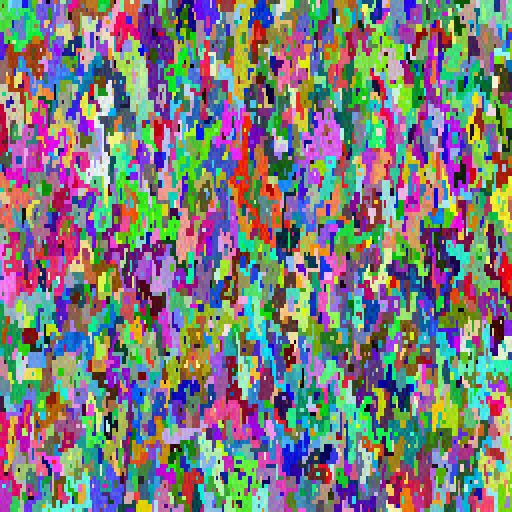

In [2]:
rng = default_rng(20240526)

# generate from random start, 15-bit colorlist
image = randomwalk_image(width=512, height=512, rng=rng)
image.save("generatedimages/random_walk_15bit_random_start.png")
display(image)


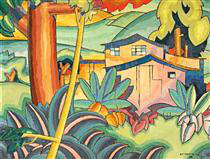

In [3]:
kahala_img = "sourceimages/old-kahala-home-1928_210x159.jpg"
chiefs_img = "sourceimages/greeting-by-chiefs-1928_210x148.jpg"

oimage = Image.open(kahala_img)
display(oimage)

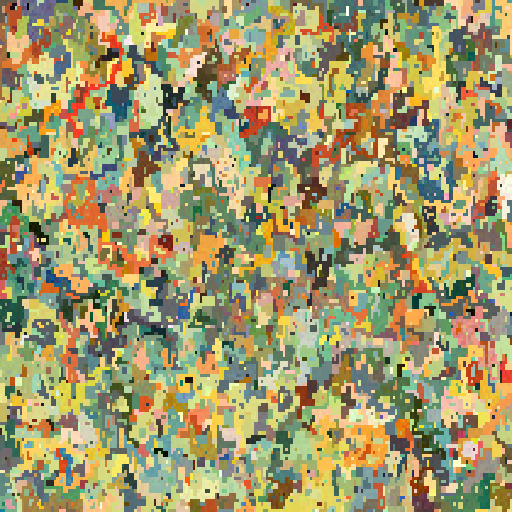

In [4]:
newimage = randomwalk_image(imgfile=kahala_img, width=512, height=512, rng=rng)
display(newimage)
newimage.save("generatedimages/kahala_random_walk_random_start.png")

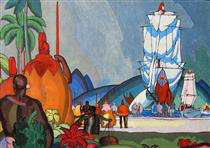

In [5]:
oimage = Image.open(chiefs_img)
display(oimage)

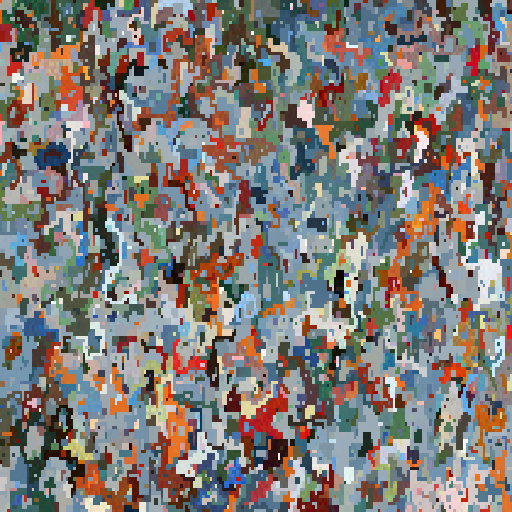

In [6]:
newimage = randomwalk_image(imgfile=chiefs_img, width=512, height=512, rng=rng)
display(newimage)
newimage.save("generatedimages/chiefs_random_walk_random_start.png")